In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [4]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)
    
                                                             
                                                             

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

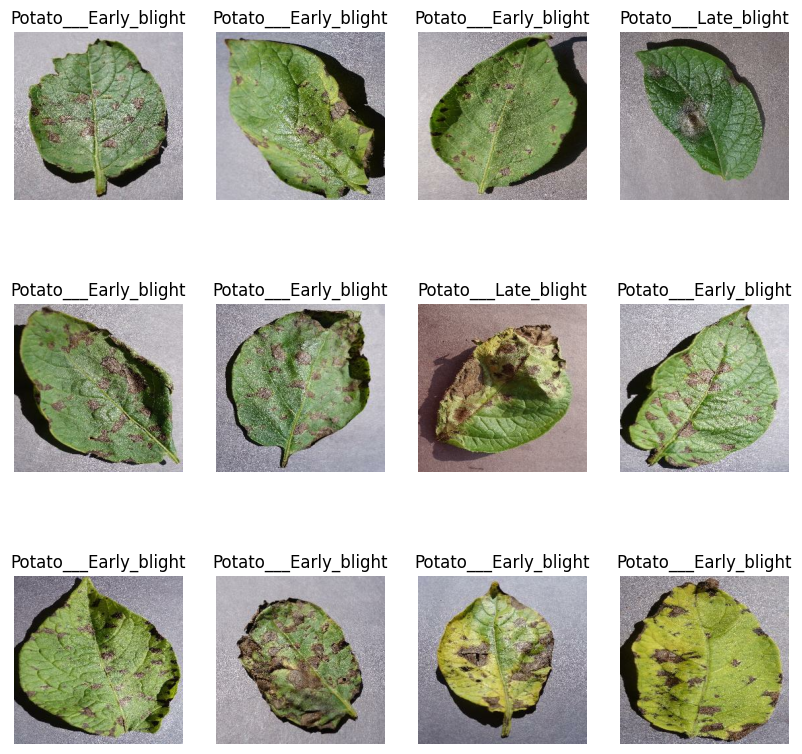

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
#2152/32 approx
len(dataset)

68

In [8]:
#training 80%, validation 10, testing 10
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds=dataset.take(54)
len(train_ds)

54

In [10]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [11]:
val_ds=0.1
val_ds*len(dataset)

6.800000000000001

In [12]:
val_ds=test_ds.skip(6)
len(val_ds)

8

In [13]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_datset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    test_size=int(test_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [15]:
train_ds,val_ds,test_ds=get_datset_partition(dataset)

In [16]:
print(len(train_ds),
len(val_ds),
len(test_ds))

54 6 8


In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
])
    

In [19]:
data_augmentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
      layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 [==============================] - 79s 1s/step - loss: 0.9097 - accuracy: 0.4699 - val_loss: 0.8007 - val_accuracy: 0.5208
Epoch 2/10
54/54 [==============================] - 83s 2s/step - loss: 0.7214 - accuracy: 0.6319 - val_loss: 0.5621 - val_accuracy: 0.7604
Epoch 3/10
54/54 [==============================] - 79s 1s/step - loss: 0.5210 - accuracy: 0.7714 - val_loss: 0.3785 - val_accuracy: 0.8229
Epoch 4/10
54/54 [==============================] - 81s 1s/step - loss: 0.3687 - accuracy: 0.8530 - val_loss: 0.2953 - val_accuracy: 0.9010
Epoch 5/10
54/54 [==============================] - 77s 1s/step - loss: 0.3673 - accuracy: 0.8530 - val_loss: 0.2449 - val_accuracy: 0.9323
Epoch 6/10
54/54 [==============================] - 77s 1s/step - loss: 0.2682 - accuracy: 0.8883 - val_loss: 0.3253 - val_accuracy: 0.8958
Epoch 7/10
54/54 [==============================] - 79s 1s/step - loss: 0.1968 - accuracy: 0.9161 - val_loss: 0.1667 - val_accuracy: 0.9167
Epoch 8/10
54/54 [==

In [24]:
scores=model.evaluate(test_ds)
scores

8/8 [==============================] - 3s 234ms/step - loss: 0.1043 - accuracy: 0.9531


[0.10425207018852234, 0.953125]

In [25]:
history

In [26]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

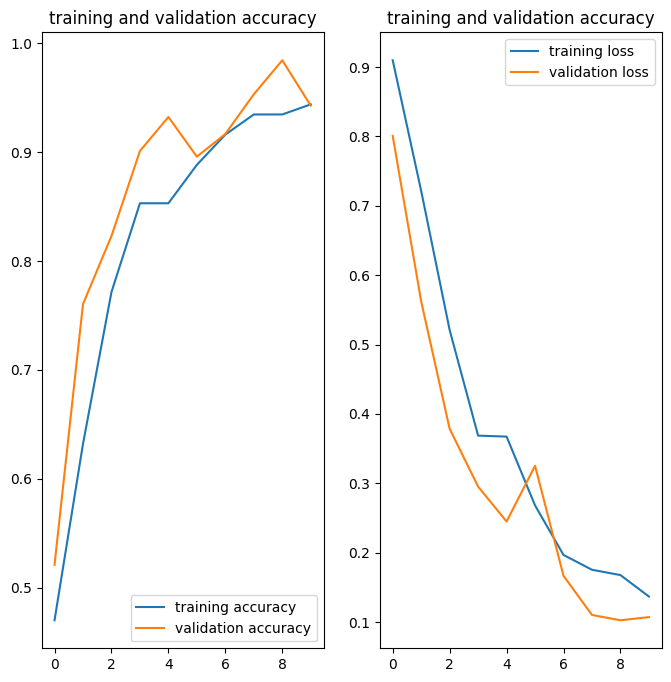

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='training accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='training loss')
plt.plot(range(EPOCHS),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation accuracy')
plt.show()

first image to predict
actual label Potato___Early_blight
1/1 [==============================] - 0s 371ms/step
predicted label Potato___Early_blight


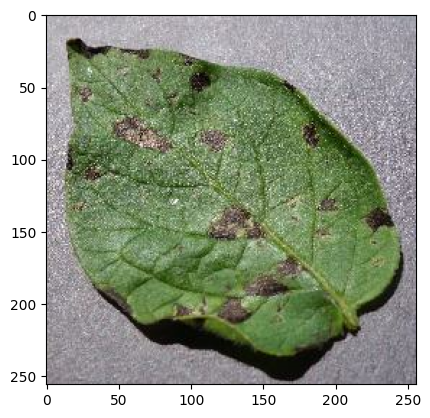

In [44]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label',class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print('predicted label',class_names[np.argmax(batch_prediction[0])])

In [ ]:
# now lets define a prediction function 

In [57]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)  
#create a batch
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100* (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 42ms/step


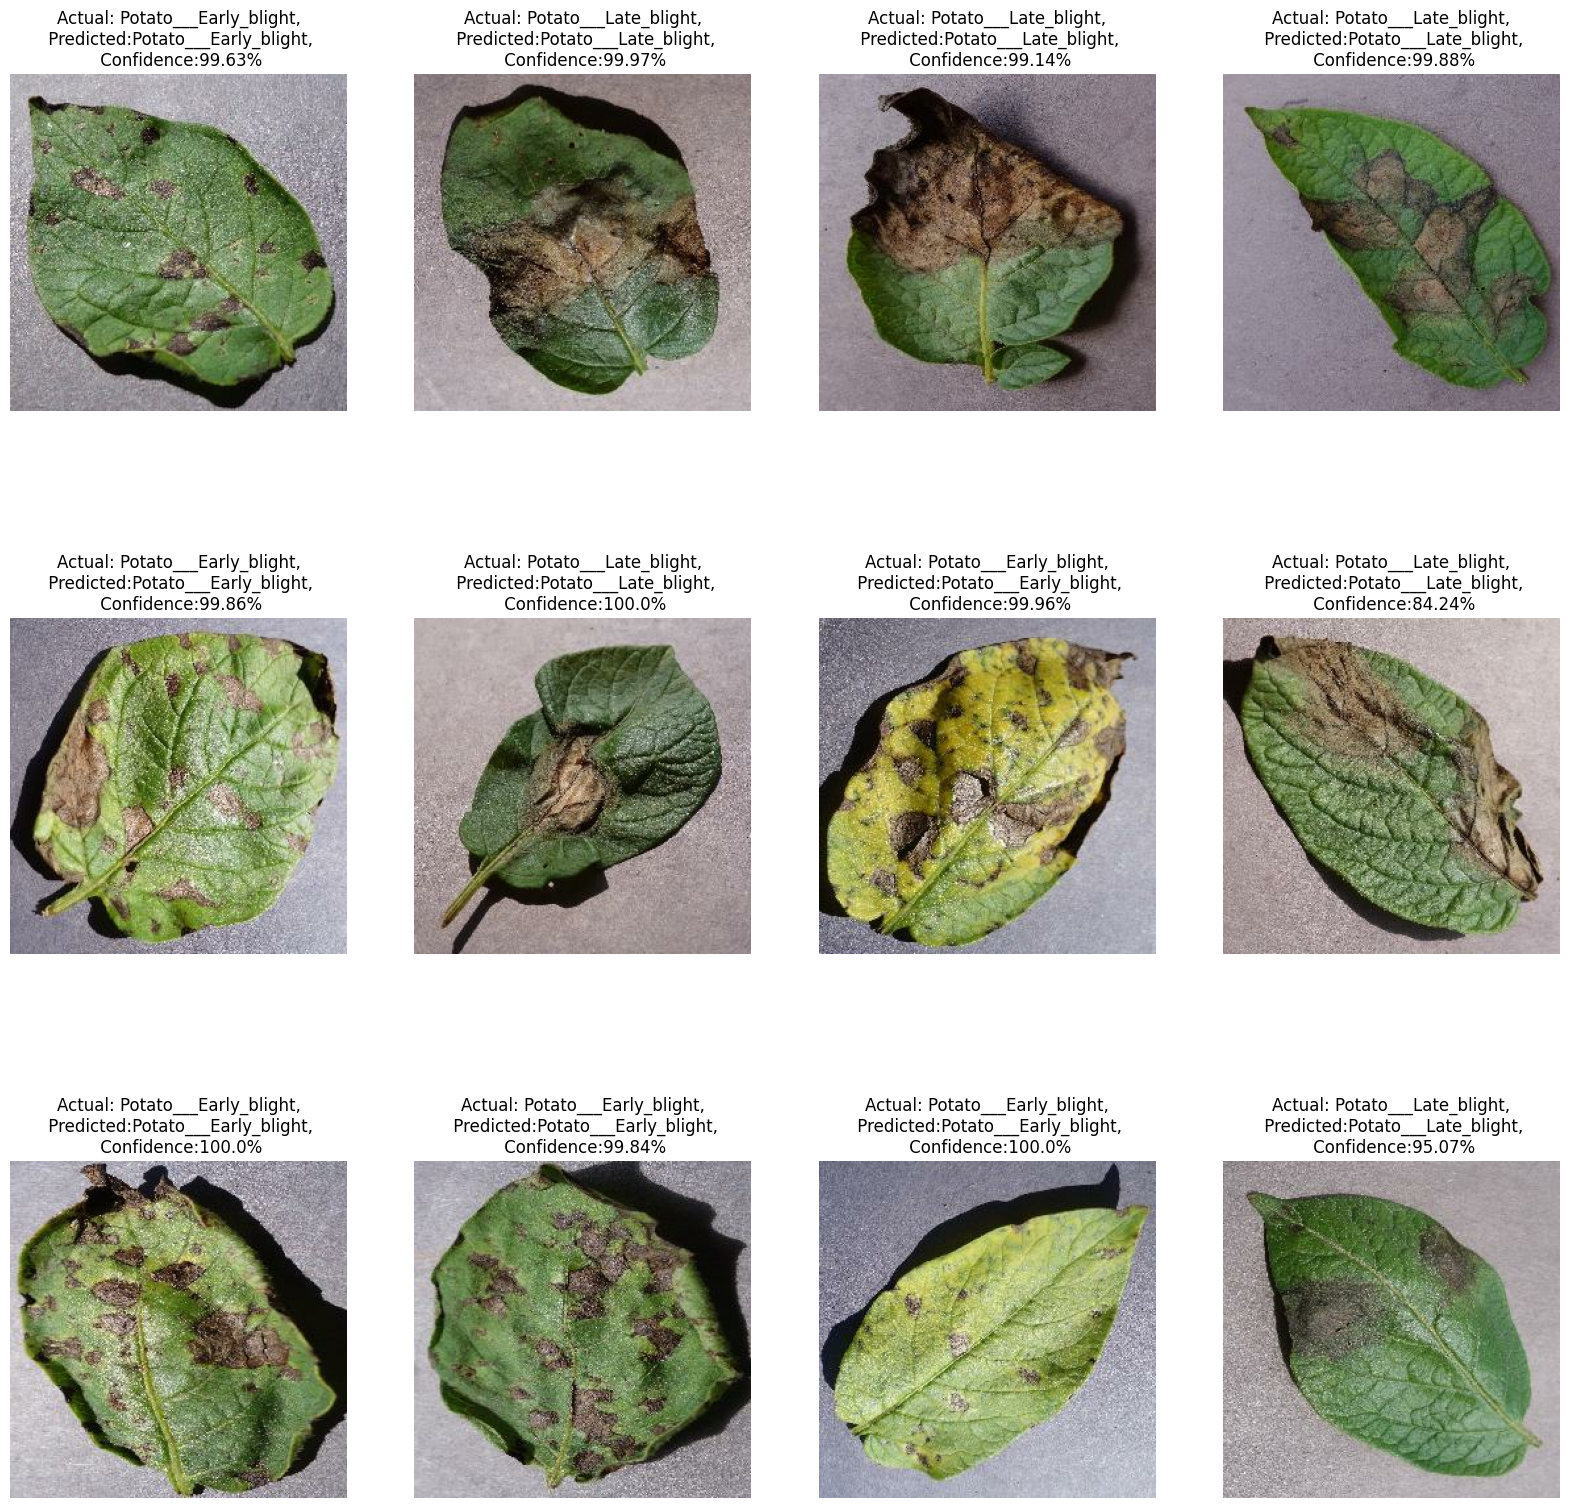

In [60]:
plt.figure(figsize=(20,20))
for images,labels in test_ds.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class,confidence=predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}%")
        
        
        plt.axis('off')
        

In [65]:
#create a new directory in models by incrementin by 1
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets
